In [1]:
import ase.io
import matplotlib.pyplot as plt
import numpy as np

import womblepy

In [2]:
e0_byhand = {'H': -12.336810713133827,
             'C': -145.60813964301911,
             'O': -429.04802314923108}

def makefig():
    fig = plt.figure()
    fig.set_figheight(8)
    fig.set_figwidth(10)
    return fig, fig.add_subplot()

In [19]:
trajectories = {"orig": ase.io.read("traj_4.xyz", ":"),
                7 : ase.io.read("gap_window7.xyz", ":"),
                11: ase.io.read("gap_window11.xyz", ":"),
                15: ase.io.read("gap_window15.xyz", ":"),
                21: ase.io.read("gap_window21.xyz", ":"),
                31: ase.io.read("gap_window31.xyz", ":"),
                41: ase.io.read("gap_window31.xyz", ":"),
                "script": ase.io.read("traj_withscript.xyz", ":")}

In [4]:
from quippy.potential import Potential
from ase.optimize.fire import FIRE
gap_path = "/home/tks32/work/oxidation_gap/fitting_iterations/iter_7.0_collide/gap_model/GAP.xml"
pot = Potential("", param_filename=gap_path)

In [5]:
at0 = ase.io.read("traj.xyz")
at0.set_calculator(pot)
opt = FIRE(at0)
opt.run()
ener_0 = (at0.get_potential_energy() - sum([e0_byhand[s] for s in at0.get_chemical_symbols()])) / len(at0)

      Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
FIRE:    0 21:36:07    -1401.245886*       0.0485


In [7]:
at1 = trajectories["orig"][0]
at1.set_calculator(pot)
opt1 = FIRE(at1)
opt1.run(fmax=0.1)
ener_1 = (at1.get_potential_energy() - sum([e0_byhand[s] for s in at1.get_chemical_symbols()])) / len(at0)

      Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
FIRE:    0 21:36:36    -1403.464038*       0.0948


In [20]:
ener = dict()

for key, val in  trajectories.items():
    ener[key] = womblepy.testing.extract_energies(val, e0=e0_byhand)


In [21]:
# fig, ax = makefig()

# for key, val in ener.items():
#     ax.plot(val, label=key)
# plt.scatter(-4, ener_0, c="k", marker="+")
# plt.scatter(0, ener_1, c="tab:red", marker="+")

# l = ax.legend()

In [10]:
def opt_frame(atoms, **kwargs):
    local_at = atoms.copy()
    local_at.set_calculator(pot)
    opt = FIRE(local_at)
    opt.run(**kwargs)
    return local_at

In [14]:
x_opt = np.arange(0, len(trajectories["orig"]), 5)
frame_before = trajectories["orig"][::5]  # same 5fs interval from the 0.25 original * 4 cut earlier
frames_opt = []

for at in frame_before:
    frames_opt.append(opt_frame(at, steps=50))

      Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
FIRE:    0 21:38:10    -1403.464038*       0.0948
FIRE:    1 21:38:10    -1403.464116*       0.1312
FIRE:    2 21:38:10    -1403.464193*       0.0608
FIRE:    3 21:38:10    -1403.464242*       0.0846
FIRE:    4 21:38:10    -1403.464302*       0.1325
FIRE:    5 21:38:10    -1403.464441*       0.0796
FIRE:    6 21:38:10    -1403.464586*       0.0599
FIRE:    7 21:38:10    -1403.464725*       0.0895
FIRE:    8 21:38:10    -1403.464926*       0.0592
FIRE:    9 21:38:10    -1403.465159*       0.0613
FIRE:   10 21:38:10    -1403.465434*       0.0930
FIRE:   11 21:38:10    -1403.465803*       0.0571
FIRE:   12 21:38:10    -1403.466227*       0.0645
FIRE:   13 21:38:10    -1403.466755*       0.0845
FIRE:   14 21:38:10    -1403.467406*       0.0544
FIRE:   15 21:38:10    -1403.468179*       0.0537
FIRE:   16 21:38:10    -1403.469067*       0.1341
FIRE:   17 21:38:11    -1403.469799*       0.3588
FI

FIRE:   28 21:38:17    -1402.218274*       0.6918
FIRE:   29 21:38:17    -1402.224075*       0.9033
FIRE:   30 21:38:17    -1402.227619*       0.7687
FIRE:   31 21:38:17    -1402.232546*       0.5343
FIRE:   32 21:38:17    -1402.236225*       0.3270
FIRE:   33 21:38:17    -1402.237863*       0.4136
FIRE:   34 21:38:17    -1402.239176*       0.5916
FIRE:   35 21:38:17    -1402.242092*       0.6406
FIRE:   36 21:38:17    -1402.246813*       0.5363
FIRE:   37 21:38:17    -1402.252470*       0.3288
FIRE:   38 21:38:17    -1402.256906*       0.3748
FIRE:   39 21:38:17    -1402.260331*       0.5578
FIRE:   40 21:38:17    -1402.265644*       0.5032
FIRE:   41 21:38:17    -1402.272823*       0.2621
FIRE:   42 21:38:17    -1402.278030*       0.3778
FIRE:   43 21:38:17    -1402.283772*       0.3728
FIRE:   44 21:38:17    -1402.290721*       0.1697
FIRE:   45 21:38:17    -1402.294421*       0.4263
FIRE:   46 21:38:17    -1402.298407*       0.2094
FIRE:   47 21:38:17    -1402.296295*       0.7040


FIRE:   33 21:38:23    -1402.077222*       1.0937
FIRE:   34 21:38:24    -1402.081188*       0.7302
FIRE:   35 21:38:24    -1402.084569*       0.7099
FIRE:   36 21:38:24    -1402.087346*       0.7514
FIRE:   37 21:38:24    -1402.089997*       0.8163
FIRE:   38 21:38:24    -1402.093552*       0.9720
FIRE:   39 21:38:24    -1402.098839*       1.0025
FIRE:   40 21:38:24    -1402.106298*       0.8447
FIRE:   41 21:38:24    -1402.115543*       0.6936
FIRE:   42 21:38:24    -1402.125548*       0.6481
FIRE:   43 21:38:24    -1402.136153*       0.7084
FIRE:   44 21:38:24    -1402.149231*       0.8442
FIRE:   45 21:38:24    -1402.166311*       0.6459
FIRE:   46 21:38:24    -1402.185765*       0.6459
FIRE:   47 21:38:24    -1402.207148*       0.6796
FIRE:   48 21:38:24    -1402.234318*       0.6560
FIRE:   49 21:38:24    -1402.265592*       0.6620
FIRE:   50 21:38:24    -1402.301924*       0.6560
      Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
FI

FIRE:   38 21:38:30    -1399.661827*       0.4378
FIRE:   39 21:38:30    -1399.666606*       0.4336
FIRE:   40 21:38:30    -1399.671905*       0.4268
FIRE:   41 21:38:30    -1399.677969*       0.4156
FIRE:   42 21:38:30    -1399.684980*       0.4051
FIRE:   43 21:38:30    -1399.692792*       0.4079
FIRE:   44 21:38:30    -1399.701503*       0.4227
FIRE:   45 21:38:30    -1399.711767*       0.4270
FIRE:   46 21:38:30    -1399.723759*       0.4153
FIRE:   47 21:38:31    -1399.738022*       0.4092
FIRE:   48 21:38:31    -1399.754928*       0.4144
FIRE:   49 21:38:31    -1399.774149*       0.4048
FIRE:   50 21:38:31    -1399.795585*       0.3945
      Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
FIRE:    0 21:38:31    -1398.469329*       3.5065
FIRE:    1 21:38:31    -1398.855508*       2.4563
FIRE:    2 21:38:31    -1399.261010*       1.9904
FIRE:    3 21:38:31    -1399.304127*       6.9729
FIRE:    4 21:38:31    -1399.444713*       2.4368
FI

FIRE:   43 21:38:37    -1400.577281*       1.9879
FIRE:   44 21:38:37    -1400.563668*       3.5625
FIRE:   45 21:38:37    -1400.589187*       2.3757
FIRE:   46 21:38:37    -1400.613444*       0.7562
FIRE:   47 21:38:37    -1400.618560*       1.0685
FIRE:   48 21:38:37    -1400.619431*       1.0224
FIRE:   49 21:38:37    -1400.621088*       0.9319
FIRE:   50 21:38:37    -1400.623381*       0.8015
      Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
FIRE:    0 21:38:37    -1399.475551*       2.4962
FIRE:    1 21:38:37    -1399.680515*       1.6588
FIRE:    2 21:38:37    -1399.686262*       6.2066
FIRE:    3 21:38:37    -1399.817924*       1.7649
FIRE:    4 21:38:37    -1399.829583*       2.1928
FIRE:    5 21:38:37    -1399.835458*       2.0384
FIRE:    6 21:38:38    -1399.845830*       1.7180
FIRE:    7 21:38:38    -1399.858097*       1.2232
FIRE:    8 21:38:38    -1399.869061*       0.8412
FIRE:    9 21:38:38    -1399.876490*       0.7771
FI

FIRE:   48 21:38:44    -1401.090307*       0.5312
FIRE:   49 21:38:44    -1401.093613*       0.5167
FIRE:   50 21:38:44    -1401.097696*       0.4988
      Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
FIRE:    0 21:38:44    -1399.341333*       5.4059
FIRE:    1 21:38:44    -1399.431717*       6.0684
FIRE:    2 21:38:44    -1399.577108*       3.2391
FIRE:    3 21:38:44    -1399.678176*       2.0390
FIRE:    4 21:38:44    -1399.669944*       3.7451
FIRE:    5 21:38:44    -1399.697552*       3.1114
FIRE:    6 21:38:44    -1399.738929*       2.2724
FIRE:    7 21:38:44    -1399.775278*       1.3549
FIRE:    8 21:38:44    -1399.794685*       1.3076
FIRE:    9 21:38:44    -1399.801159*       2.5284
FIRE:   10 21:38:44    -1399.803068*       2.4577
FIRE:   11 21:38:44    -1399.806733*       2.3191
FIRE:   12 21:38:44    -1399.811874*       2.1182
FIRE:   13 21:38:44    -1399.818119*       1.8635
FIRE:   14 21:38:44    -1399.825066*       1.5672
FI

FIRE:    1 21:38:50    -1399.918329*       3.9290
FIRE:    2 21:38:50    -1399.987053*       1.9034
FIRE:    3 21:38:50    -1400.043176*       1.7925
FIRE:    4 21:38:50    -1400.089438*       3.2480
FIRE:    5 21:38:50    -1400.197284*       2.6628
FIRE:    6 21:38:50    -1400.321996*       1.2257
FIRE:    7 21:38:51    -1400.379893*       2.3970
FIRE:    8 21:38:51    -1400.440313*       2.6732
FIRE:    9 21:38:51    -1400.545727*       0.8853
FIRE:   10 21:38:51    -1400.559489*       2.5121
FIRE:   11 21:38:51    -1400.574700*       2.0315
FIRE:   12 21:38:51    -1400.595226*       1.1876
FIRE:   13 21:38:51    -1400.608376*       0.6875
FIRE:   14 21:38:51    -1400.610188*       1.0203
FIRE:   15 21:38:51    -1400.611277*       0.9713
FIRE:   16 21:38:51    -1400.613296*       0.8776
FIRE:   17 21:38:51    -1400.615962*       0.7475
FIRE:   18 21:38:51    -1400.618939*       0.5975
FIRE:   19 21:38:51    -1400.621920*       0.5985
FIRE:   20 21:38:51    -1400.624710*       0.5974


FIRE:    6 21:38:57    -1400.161088*       2.7227
FIRE:    7 21:38:57    -1400.207380*       1.7918
FIRE:    8 21:38:57    -1400.230808*       1.3777
FIRE:    9 21:38:57    -1400.240096*       2.0175
FIRE:   10 21:38:57    -1400.253049*       2.4018
FIRE:   11 21:38:57    -1400.281428*       2.4758
FIRE:   12 21:38:57    -1400.332378*       2.2324
FIRE:   13 21:38:57    -1400.398681*       1.5845
FIRE:   14 21:38:57    -1400.458131*       0.9864
FIRE:   15 21:38:57    -1400.498190*       2.0783
FIRE:   16 21:38:57    -1400.551488*       2.5602
FIRE:   17 21:38:57    -1400.640102*       1.5329
FIRE:   18 21:38:57    -1400.715247*       1.0965
FIRE:   19 21:38:57    -1400.778848*       1.7367
FIRE:   20 21:38:57    -1400.876829*       1.1742
FIRE:   21 21:38:57    -1400.947039*       1.9965
FIRE:   22 21:38:57    -1401.028138*       1.6937
FIRE:   23 21:38:57    -1401.085311*       1.6529
FIRE:   24 21:38:57    -1401.095652*       1.0260
FIRE:   25 21:38:58    -1401.105692*       0.5228


FIRE:   11 21:39:03    -1400.368770*       1.4818
FIRE:   12 21:39:03    -1400.370072*       1.3831
FIRE:   13 21:39:03    -1400.371875*       1.2402
FIRE:   14 21:39:03    -1400.374025*       1.0598
FIRE:   15 21:39:03    -1400.376359*       0.8510
FIRE:   16 21:39:03    -1400.378734*       0.6262
FIRE:   17 21:39:04    -1400.381061*       0.5745
FIRE:   18 21:39:04    -1400.383552*       0.5709
FIRE:   19 21:39:04    -1400.386285*       0.5664
FIRE:   20 21:39:04    -1400.389488*       0.5613
FIRE:   21 21:39:04    -1400.393537*       0.6290
FIRE:   22 21:39:04    -1400.398853*       0.6540
FIRE:   23 21:39:04    -1400.405720*       0.6082
FIRE:   24 21:39:04    -1400.414089*       0.5301
FIRE:   25 21:39:04    -1400.423615*       0.5184
FIRE:   26 21:39:04    -1400.434195*       0.5128
FIRE:   27 21:39:04    -1400.446579*       0.6762
FIRE:   28 21:39:04    -1400.461747*       0.5644
FIRE:   29 21:39:04    -1400.479369*       0.4450
FIRE:   30 21:39:04    -1400.498492*       0.4928


In [16]:
ase.io.write("optimised_every5th.xyz", frames_opt)

# # read it from file
# frames_opt = ase.io.read("opttimised_every5th.xyz", ":")

In [17]:
ener_opt = womblepy.testing.extract_energies(frames_opt, e0=e0_byhand)

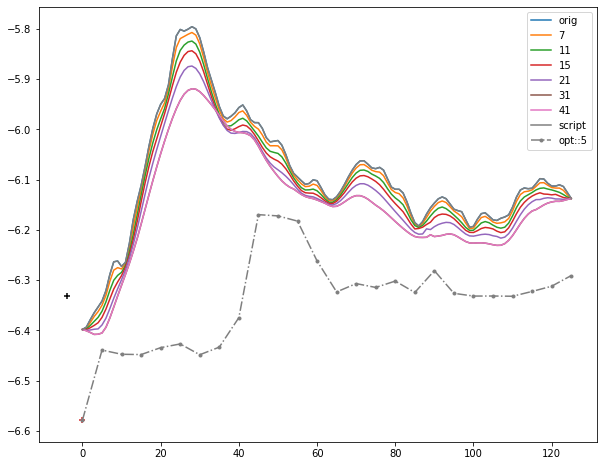

In [22]:
fig, ax = makefig()

for key, val in ener.items():
    ax.plot(val, label=key)
ax.scatter(-4, ener_0, c="k", marker="+")
ax.scatter(0, ener_1, c="tab:red", marker="+")

ax.plot(x_opt, ener_opt, marker=".", linestyle="-.", c="tab:gray", label="opt::5")


l = ax.legend()
